In [59]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [60]:
gradient = np.linspace(0, 1, 256, dtype=np.float32)
gradient = np.repeat([gradient], repeats=32, axis=0)
gradient.shape

(32, 256)

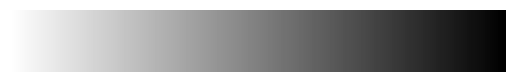

In [61]:
fig, ax = plt.subplots()
ax.set_axis_off()
ax.imshow(gradient, interpolation='nearest', cmap=plt.cm.binary)

In [62]:
def createBayerMatrix(n):
	def _inner(n):
		M = np.zeros((n, n), dtype=np.float32)
		if n > 1:
			halfN = n // 2
			Mn = 4 * _inner(halfN)

			M[:halfN, :halfN] = Mn
			M[:halfN, halfN:] = Mn + 2
			M[halfN:, :halfN] = Mn + 3
			M[halfN:, halfN:] = Mn + 1

		return M
	
	return (1 + _inner(n)) / ((n ** 2) + 1)

In [63]:
bMatrices = [createBayerMatrix(2 ** i) for i in range(1, 5)]

In [77]:
def orderedDither(image, thresholdMap):
	tHeight, tWidth = thresholdMap.shape
	out = np.zeros(image.shape, dtype=np.float32)

	for y in range(image.shape[0]):
		for x in range(image.shape[1]):
			out[y, x] = image[y, x] > thresholdMap[y % tHeight, x % tWidth]

	return out

In [65]:
def PSNR(original, compressed): 
	mse = np.mean((original - compressed) ** 2) 
	if(mse == 0):
		return 100

	psnr = 20 * np.log10(255 / np.sqrt(mse)) 
	return psnr 

Bayer 2x2:	PSNR = 56.872859
Bayer 4x4:	PSNR = 56.189340
Bayer 8x8:	PSNR = 55.986324
Bayer 16x16:	PSNR = 55.937470


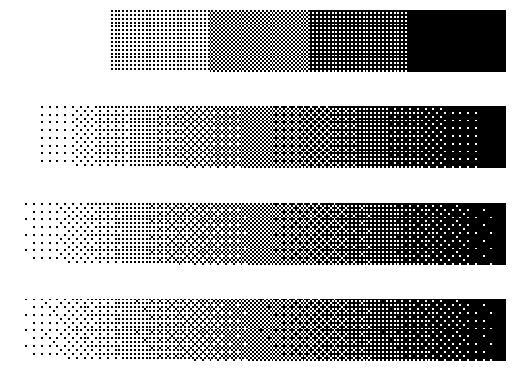

In [89]:
fig, axs = plt.subplots(len(bMatrices))

for m, ax in zip(bMatrices, axs):
	ax.set_axis_off()

	dithered = orderedDither(gradient, m)

	print("Bayer %dx%d:	PSNR = %f" % (*m.shape, PSNR(gradient, dithered)))

	ax.imshow(dithered, interpolation='nearest', cmap=plt.cm.binary, vmin=0, vmax=1)

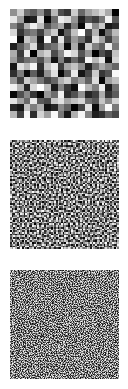

In [79]:
from glob import glob

blueNoise = [cv.imread(path, cv.IMREAD_GRAYSCALE).astype(np.float32) / 255 for path in glob('src/assets/blueNoise/*.png')]
blueNoise.sort(key = lambda noise: noise.shape[0])

fig, axs = plt.subplots(len(blueNoise))

for noise, ax in zip(blueNoise, axs):
	ax.set_axis_off()
	ax.imshow(noise, interpolation='nearest', cmap=plt.cm.binary, vmin=0, vmax=1)

Blue noise 16x16:	PSNR = 55.912174
Blue noise 64x64:	PSNR = 55.924666
Blue noise 128x128:	PSNR = 55.910865


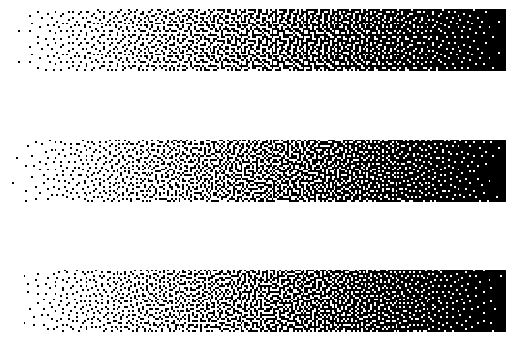

In [88]:
fig, axs = plt.subplots(len(blueNoise))

for noise, ax in zip(blueNoise, axs):
	dithered = orderedDither(gradient, noise)
	print("Blue noise %dx%d:	PSNR = %f" % (*noise.shape, PSNR(gradient, dithered)))
	
	ax.set_axis_off()
	ax.imshow(dithered, interpolation='nearest', cmap=plt.cm.binary, vmin=0, vmax=1)